A. INTRODUCTION

In the fast-paced world of real estate, every smart upgrade can make or break a sale. Now, imagine if you had a tool that could tell you exactly which home renovations would boost property values the most. This analysis will assist a real estate agent, with the help of advanced data analytics, to effortlessly identify the best improvements for any home, ensuring every dollar spent translates into a significant increase in value.


B. PROBLEM STATEMENT

Determining which home renovations will most effectively increase property values is a significant challenge for real estate agencies, homeowners, and property investors. 

Without precise, data-driven guidance, resources are often allocated to improvements that yield suboptimal returns, leading to inefficiencies and missed opportunities for maximizing property values. 

This project aims to address this problem by leveraging advanced linear regression models to identify key features and renovations that significantly impact home values. By providing clear, actionable insights, the project seeks to empower stakeholders to make informed decisions, optimize resource allocation, and ultimately enhance the market value of properties.

C. MAIN OBJECTIVE

D. SPECIFIC OBJECTIVES

2. BUSINESS UNDERSTANDING

3. DATA UNDERSTANDING

4. DATA PREPARATION

In preparing the data for analysis, several steps were taken to ensure the data's quality, relevance, and reliability. Here's an overview of the data preparation process and the reasoning behind it:

a)Checking for missing data. There are two ways which this could be handles which is either use the meadian as the missing values or drop the rows or columns with high percentage of missing values or critical information.

b)Checking for outliers.

c)Checking for duplicates.

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid') 

In [27]:
# loading the data
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [28]:
df.shape

(21597, 21)

In [29]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

* `id` - Unique identifier for a house
* `date` - Date house was sold
* `price` - Sale price (prediction target)
* `bedrooms` - Number of bedrooms
* `bathrooms` - Number of bathrooms
* `sqft_living` - Square footage of living space in the home
* `sqft_lot` - Square footage of the lot
* `floors` - Number of floors (levels) in house
* `waterfront` - Whether the house is on a waterfront
* `view` - Quality of view from house
* `condition` - How good the overall condition of the house is. Related to maintenance of house.
* `grade` - Overall grade of the house. Related to the construction and design of the house.
* `sqft_above` - Square footage of house apart from basement
* `sqft_basement` - Square footage of the basement
* `yr_built` - Year when house was built
* `yr_renovated` - Year when house was renovated
* `zipcode` - ZIP Code used by the United States Postal Service
* `lat` - Latitude coordinate
* `long` - Longitude coordinate
* `sqft_living15` - The square footage of interior housing living space for the nearest 15 neighbors
* `sqft_lot15` - The square footage of the land lots of the nearest 15 neighbors


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [31]:
#checking for missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [32]:
#drop missing values from the column view
df.dropna(subset= 'view', inplace = True)

In [33]:
# the distribution of foreign_gross is right skewed we'll use median to replace our misssing data
df['yr_renovated'].fillna(df['yr_renovated'].median(), inplace = True)


In [34]:
df['waterfront'].unique()

array([nan, 'NO', 'YES'], dtype=object)

In [35]:
df['waterfront'] = df['waterfront'].apply(lambda x: 'NO' if x != 'YES' else x)

In [36]:
#check for duplicates in the column id 
def unique_column_duplicates(data, column):
    
    # Check for duplicates in the specified column
    duplicated_count = data[column].duplicated().sum()
    
    if duplicated_count == 0:
        print(f"The column {column.title()} has no duplicates.")
    else:
        print(f"The column {column.title()} has {duplicated_count} duplicated rows.")


unique_column_duplicates(df, 'id')

The column Id has 177 duplicated rows.


In [37]:
unique_column_duplicates

<function __main__.unique_column_duplicates(data, column)>

In [38]:
#dropping the dplicate rows
df.drop_duplicates(subset = 'id', keep = 'first', inplace = True)

In [39]:
#filling missing values in yr_renoated colmn
df['yr_renovated'].fillna(0, inplace=True)
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
df['grade']. unique()

array(['7 Average', '6 Low Average', '8 Good', '11 Excellent', '9 Better',
       '5 Fair', '10 Very Good', '12 Luxury', '4 Low', '3 Poor',
       '13 Mansion'], dtype=object)

In [41]:
# Define mapping dictionary
grade_mapping = {
    '3 Poor': 3,
    '4 Low': 4,
    '5 Fair': 5,
    '6 Low Average': 6,
    '7 Average': 7,
    '8 Good': 8,
    '9 Better': 9,
    '10 Very Good': 10,
    '11 Excellent': 11,
    '12 Luxury': 12,
    '13 Mansion': 13
}

# Apply mapping to 'grade' column
df['grade'] = df['grade'].map(grade_mapping)

In [42]:
df['bedrooms']. unique()

array([ 3,  2,  4,  5,  1,  6,  7,  8,  9, 11, 10, 33], dtype=int64)

In [43]:
df['view'].unique()

array(['NONE', 'GOOD', 'EXCELLENT', 'AVERAGE', 'FAIR'], dtype=object)

In [44]:
# Define mapping dictionary
view_mapping = {
    'NONE': 0,
    'FAIR': 1,
    'AVERAGE': 2,
    'GOOD': 3,
    'EXCELLENT': 4,  # Example for handling variations in categories
    # Add more mappings as needed
}

# Apply mapping to 'grade' column
df['view'] = df['view'].map(view_mapping).fillna(df['view'])

In [45]:
df['condition'].unique()

array(['Average', 'Very Good', 'Good', 'Poor', 'Fair'], dtype=object)

In [46]:
# Define mapping dictionary
condition_mapping = {
    'Poor': 0,
    'Fair': 1,
    'Average': 2,
    'Good': 3,
    'Very Good': 4,  # Example for handling variations in categories
    # Add more mappings as needed
}

# Apply mapping to 'grade' column
df['condition'] = df['condition'].map(condition_mapping).fillna(df['condition'])

In [47]:
# Define mapping dictionary
waterfront_mapping = {
    'NO': 0,
    'YES': 1,
    
}

# Apply mapping to 'grade' column
df['waterfront'] = df['waterfront'].map(waterfront_mapping).fillna(df['waterfront'])

In [48]:
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [49]:
# Select only numerical columns for correlation analysis
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Perform correlation analysis
correlation_matrix = df[numerical_columns].corr()
correlation_matrix

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,-0.019161,0.000529,0.004146,-0.013599,-0.132802,0.018100,-0.004290,0.010925,-0.024444,0.006605,-0.011968,0.021160,-0.010717,-0.007747,-0.002974,0.019297,-0.003895,-0.139482
price,-0.019161,1.000000,0.308724,0.525371,0.701542,0.089570,0.256534,0.259805,0.395360,0.034103,0.668376,0.605623,0.053223,0.118615,-0.052583,0.306919,0.021360,0.584606,0.082782
bedrooms,0.000529,0.308724,1.000000,0.515245,0.578790,0.032756,0.177177,-0.003819,0.078523,0.025797,0.357521,0.480005,0.155031,0.017365,-0.154961,-0.011738,0.132707,0.394417,0.030834
bathrooms,0.004146,0.525371,0.515245,1.000000,0.755037,0.088328,0.501502,0.061110,0.185383,-0.129576,0.665055,0.685830,0.506644,0.047463,-0.203526,0.023346,0.223928,0.568701,0.088313
sqft_living,-0.013599,0.701542,0.578790,0.755037,1.000000,0.172899,0.352438,0.102075,0.281658,-0.062024,0.762092,0.876640,0.316707,0.050660,-0.199029,0.050961,0.240855,0.755991,0.184296
sqft_lot,-0.132802,0.089570,0.032756,0.088328,0.172899,1.000000,-0.005775,0.021436,0.075605,-0.008712,0.114046,0.183393,0.052009,0.005104,-0.129684,-0.085451,0.230175,0.144182,0.716629
floors,0.018100,0.256534,0.177177,0.501502,0.352438,-0.005775,1.000000,0.020137,0.027193,-0.266929,0.457988,0.522122,0.489153,0.002659,-0.057948,0.049078,0.124190,0.278137,-0.011497
waterfront,-0.004290,0.259805,-0.003819,0.061110,0.102075,0.021436,0.020137,1.000000,0.383115,0.016182,0.081274,0.069886,-0.025358,0.074485,0.029753,-0.012393,-0.038102,0.082445,0.030599
view,0.010925,0.395360,0.078523,0.185383,0.281658,0.075605,0.027193,0.383115,1.000000,0.044790,0.248276,0.165570,-0.056290,0.089965,0.087559,0.005652,-0.079216,0.278188,0.073630
condition,-0.024444,0.034103,0.025797,-0.129576,-0.062024,-0.008712,-0.266929,0.016182,0.044790,1.000000,-0.150952,-0.161416,-0.364943,-0.056187,0.003606,-0.016065,-0.106752,-0.095362,-0.003023


In [50]:
print(correlation_matrix['price'])

id              -0.019161
price            1.000000
bedrooms         0.308724
bathrooms        0.525371
sqft_living      0.701542
sqft_lot         0.089570
floors           0.256534
waterfront       0.259805
view             0.395360
condition        0.034103
grade            0.668376
sqft_above       0.605623
yr_built         0.053223
yr_renovated     0.118615
zipcode         -0.052583
lat              0.306919
long             0.021360
sqft_living15    0.584606
sqft_lot15       0.082782
Name: price, dtype: float64


Interpreting the Correlation Coefficients

Positive Correlation (r > 0): As the value of one variable increases, the value of the other variable also tends to increase. For example, sqft_living has a positive correlation of 0.701542 with price, indicating that as the living area increases, the house price tends to increase as well.

Negative Correlation (r < 0): As the value of one variable increases, the value of the other variable tends to decrease. For example, zipcode has a negative correlation of -0.052583 with price, suggesting that there might be a slight tendency for lower house prices in certain zip codes compared to others.

No Correlation (r = 0): There is no linear relationship between the variables. For instance, long has a correlation of 0.021360 with price, indicating a very weak correlation.

Strength of Correlation:
The closer the absolute value of r is to 1, the stronger the correlation:
grade (0.668376) and sqft_above (0.605623) show strong positive correlations with price.
yr_built (0.053223) and zipcode (-0.052583) show very weak correlations with price.

Direction of Relationship:
Positive coefficients indicate that the variables move in the same direction (both increase or decrease together).
Negative coefficients indicate that the variables move in opposite directions (one increases while the other decreases).
Example Interpretation:
bathrooms (0.525371): There is a moderate positive correlation between the number of bathrooms and the price. Houses with more bathrooms tend to have higher prices.
zipcode (-0.052583): There is a very weak negative correlation between the zipcode and the price. This suggests that there might be a slight tendency for house prices to vary slightly based on the zipcode, but the effect is minimal.

Strong Positive Correlations (close to 1):

grade (0.668376),
sqft_above (0.605623),
sqft_living15 (0.584606),
sqft_living (0.701542),
bathrooms (0.525371),
view (0.395360),
lat (0.306919),

Moderate Positive Correlations:
bedrooms (0.308724)

Weak Correlations (close to 0):
yr_built (0.053223),
yr_renovated (0.118615),
sqft_lot (0.089570),
sqft_lot15 (0.082782),
floors (0.256534),
waterfront (0.259805),
condition (0.034103),
long (0.021360),
zipcode (-0.052583)

multicollinearity

High Correlations:

sqft_living and sqft_above have a correlation of 0.876640.
sqft_living and grade have a correlation of 0.762092.
sqft_living and bathrooms have a correlation of 0.755037.
These pairs suggest potential multicollinearity issues, particularly between sqft_living, sqft_above, and grade

bed vs bath 0.515245,
bed vs sqft-liv 0.57879,
bath vs sft_liv 0.5687,
bath vs yr_built 0.5,
bath vs sq_above 0.68583,
bath vs grade 0.665055,
bath vs floor 0.5015,
bath vs sqft_liv 0.755,
sqft_liv vs grade 0.762092,
sqft_liv vs sft_abo 0.87664 

In [51]:
#drop columns with the highest multicollinearity
columns_to_drop = ['sqft_above', 'grade', 'sqft_living15']
df = df.drop(columns_to_drop, axis=1)

In [52]:
#dealing with dates

# Convert 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format='%m/%d/%Y')

# Calculate years since built to sold
df['yr_built_to_sale'] = df['date'].dt.year - df['yr_built']

# Calculate years since renovation to sold (if renovated)
df['yr_renovated_to_sale'] = df['date'].dt.year - df['yr_renovated']
df.loc[df['yr_renovated'] == 0, 'yr_renovated_to_sale'] = 0  # Set to 0 if never renovated

print(df[['price', 'yr_built_to_sale', 'yr_renovated_to_sale']].head())

      price  yr_built_to_sale  yr_renovated_to_sale
0  221900.0                59                   0.0
1  538000.0                63                  23.0
2  180000.0                82                   0.0
3  604000.0                49                   0.0
4  510000.0                28                   0.0


In [53]:
# Calculate correlation between the new columns and price
correlation_yr_built = df['yr_built_to_sale'].corr(df['price'])
correlation_yr_renovated = df['yr_renovated_to_sale'].corr(df['price'])
correlation_each_other = df['yr_built_to_sale'].corr(df['yr_renovated_to_sale'])

print(f"Correlation between yr_built_to_sale and price: {correlation_yr_built}")
print(f"Correlation between yr_renovated_to_sale and price: {correlation_yr_renovated}")
print(f"the correlation between each other is: {correlation_each_other} ")

Correlation between yr_built_to_sale and price: -0.053147362544303654
Correlation between yr_renovated_to_sale and price: 0.0633656748636725
the correlation between each other is: 0.17616725223354918 


Interpretation:
The correlation coefficient (r) ranges from -1 to 1.
A correlation close to 1 indicates a strong positive correlation (as one variable increases, the other tends to increase as well).
A correlation close to -1 indicates a strong negative correlation (as one variable increases, the other tends to decrease).
A correlation close to 0 indicates no linear relationship between the variables.
In the example:

yr_built_to_sale has a moderate negative correlation with price (-0.384), suggesting that as the number of years since the house was built increases, the price tends to decrease slightly.
yr_renovated_to_sale has a very weak positive correlation with price (0.046), indicating a minimal positive relationship between years since renovation and price.

In [54]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_lot15', 'yr_built_to_sale', 'yr_renovated_to_sale'],
      dtype='object')

In [55]:
#selet necessary columns

selected_columns = ['price','bedrooms','bathrooms','sqft_living','floors','waterfront','view','condition','lat','long','sqft_lot15','yr_built_to_sale','yr_renovated_to_sale']
df1 = df[selected_columns]
df1.head()

,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,lat,long,sqft_lot15,yr_built_to_sale,yr_renovated_to_sale
0,221900.0,3,1.00,1180,1.0,0,0,2,47.5112,-122.257,5650,59,0.0
1,538000.0,3,2.25,2570,2.0,0,0,2,47.7210,-122.319,7639,63,23.0
2,180000.0,2,1.00,770,1.0,0,0,2,47.7379,-122.233,8062,82,0.0
3,604000.0,4,3.00,1960,1.0,0,0,4,47.5208,-122.393,5000,49,0.0
4,510000.0,3,2.00,1680,1.0,0,0,2,47.6168,-122.045,7503,28,0.0


In [56]:
#checking for normality 
from scipy.stats import shapiro, zscore, probplot

    # Perform Shapiro-Wilk test for normality
stat, p_value = shapiro(df1[col])
print(f'Shapiro-Wilk test for {col}:')
print(f'Statistic: {stat}, p-value: {p_value}')
if p_value > 0.05:
    print(f'{col} is likely normally distributed (p-value={p_value:.4f})')
else:
    print(f'{col} is not normally distributed (p-value={p_value:.4f})')

NameError: name 'col' is not defined

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


AttributeError: module 'seaborn' has no attribute 'qqplot'

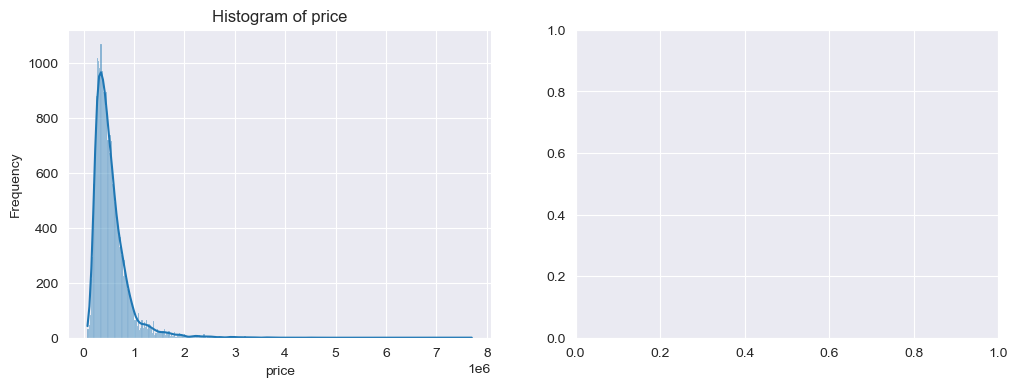

In [ ]:
# Checking for Normal Distribution
numeric_columns = df1.select_dtypes(include=[np.number]).columns.tolist()

for col in numeric_columns:
    # Plot histogram and Q-Q plot
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df1[col], kde=True, ax=ax1)
    ax1.set_title(f'Histogram of {col}')
    ax1.set_xlabel(col)
    ax1.set_ylabel('Frequency')

    sns.qqplot(df1[col], line='s', ax=ax2)
    ax2.set_title(f'Q-Q Plot of {col}')
    plt.tight_layout()
    plt.show()

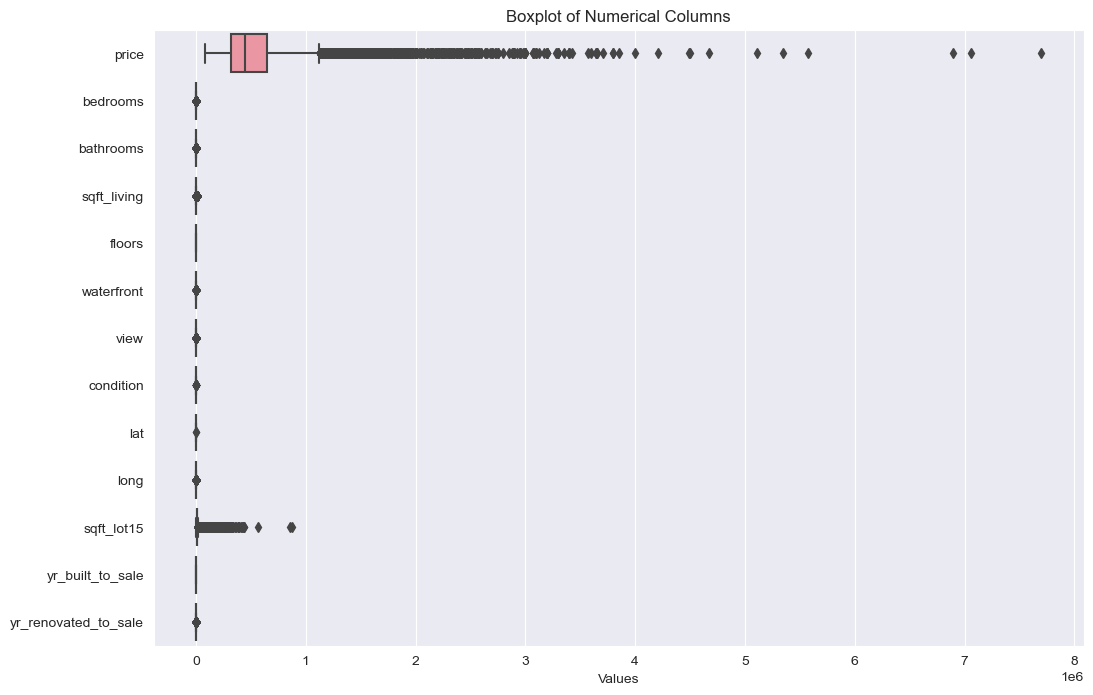

In [ ]:
# Identifying Outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=df1[numeric_columns], orient='h')
plt.title('Boxplot of Numerical Columns')
plt.xlabel('Values')
plt.show()


In [ ]:
# Detect outliers using Z-score
z_scores = np.abs(zscore(df1[numeric_columns]))
outliers = (z_scores > 3).all(axis=1)
outliers_df = df1[outliers]
print(f'Number of outliers detected: {outliers.sum()}')
print('Outliers:')
print(outliers_df)

Number of outliers detected: 0
Outliers:
Empty DataFrame
Columns: [price, bedrooms, bathrooms, sqft_living, floors, waterfront, view, condition, lat, long, sqft_lot15, yr_built_to_sale, yr_renovated_to_sale]
Index: []


In [ ]:
df1.shape

NameError: name 'df1' is not defined

5. DATA VISUALIZATION

A. Simple Liner Regression Model

For our first simple regression model, we will use sqft_living, since it showed the highest correlation.

sqft_living as the predictor (corr: 0.7019)

    1. We'll split the dataset into training and testing sets using an 80-20 split.

    2. Then we train the model

    3. Make predictions using the trained model.

    4. Finally we evaluate the performance of the model.

In [ ]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

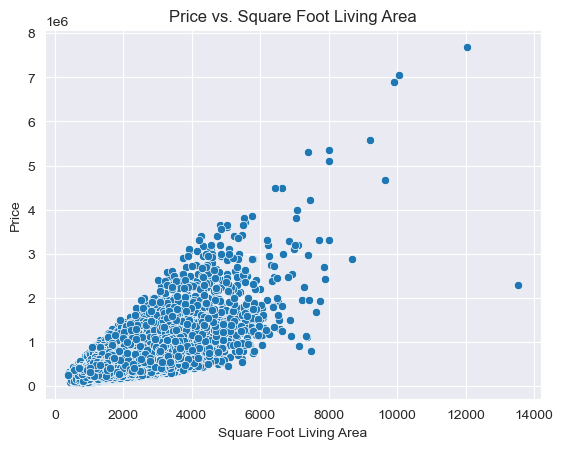

In [ ]:
# Visualize the relationship between price and sqft_living
sns.scatterplot(x='sqft_living', y='price', data=df)
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.title('Price vs. Square Foot Living Area')
plt.show()

In [ ]:
# Define the independent variable (X) and dependent variable (y)
X = df[['sqft_living']]
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 170982.92465955476
Mean Squared Error: 65977373783.61759
R-squared: 0.49332469237979504


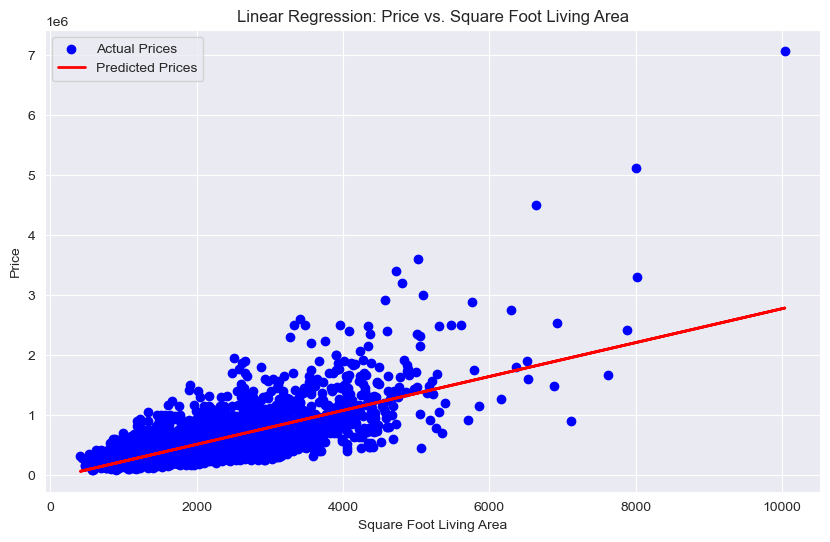

In [ ]:
# Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicted Prices')
plt.xlabel('Square Foot Living Area')
plt.ylabel('Price')
plt.title('Linear Regression: Price vs. Square Foot Living Area')
plt.legend()
plt.show()

The blue points represent the actual prices, and the red line represents the regression line obtained from our linear regression model.

PLOTTING RESIDUALS

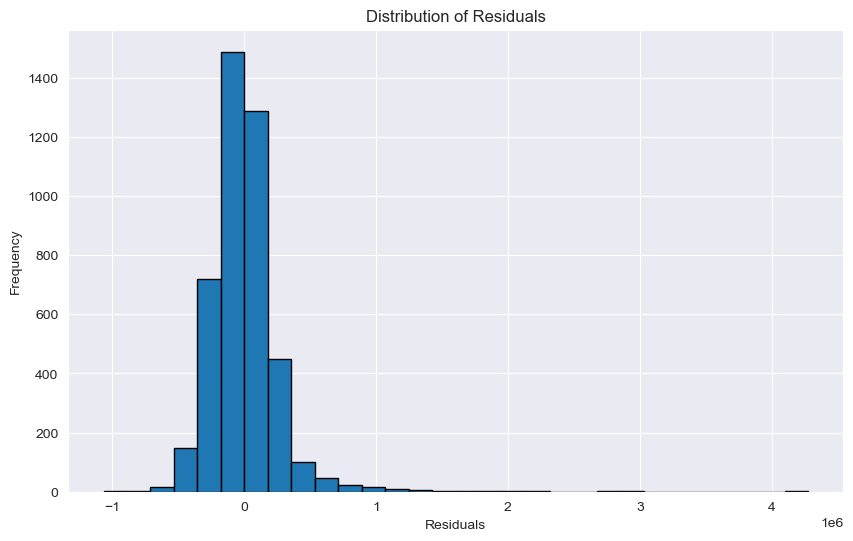

In [ ]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot a histogram of the residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Distribution of Residuals')
plt.show()

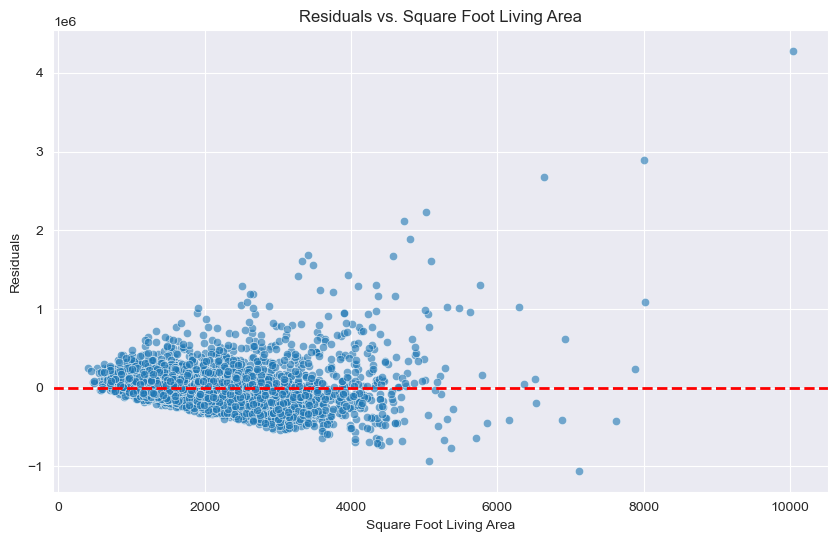

In [ ]:
# Plot the residuals
plt.figure(figsize=(10, 6))
plt.scatter(X_test, residuals, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.axhline(y=0, color='r', linestyle='--', linewidth=2)
plt.xlabel('Square Foot Living Area')
plt.ylabel('Residuals')
plt.title('Residuals vs. Square Foot Living Area')
plt.show()

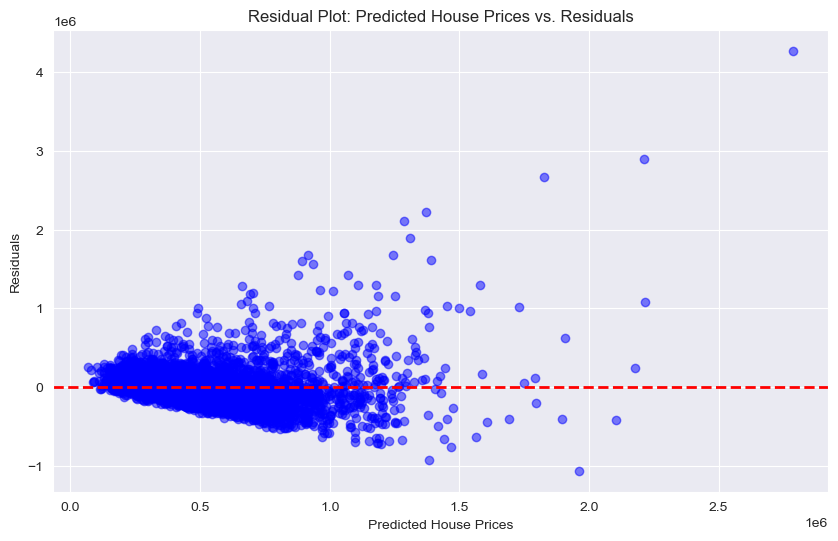

In [ ]:
# Create a residual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)

# Add labels and title
plt.xlabel('Predicted House Prices')
plt.ylabel('Residuals')
plt.title('Residual Plot: Predicted House Prices vs. Residuals')

# Display the plot
plt.show()

From the plots, we can observe that:

1. Heretoscedasticity: It is not linear and there is unequal variance of errors
2. Presence of outliers: There are some large residuals (both positive and negative), indicating that there are predictions that are significantly off from the actual values.


B. MULTIPLE LINEAR REGRESSION

c:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


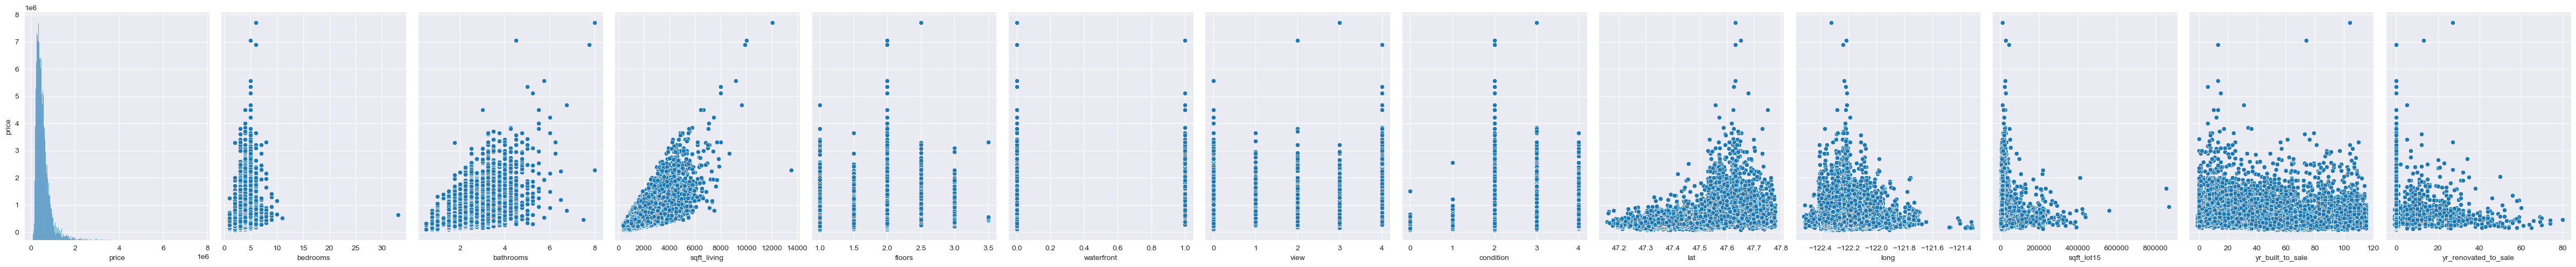

In [57]:
# Visualize the relationships between price and other features
sns.pairplot(df, x_vars= df1[selected_columns], y_vars='price', height=5, aspect=0.75)
plt.show()

In [58]:
# Define the independent variable (X) and dependent variable (y)
X = df[selected_columns]
y = df['price']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
# Create the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [64]:
# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE) and R-squared (R²) score
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 7.106321523740386e-11
Mean Squared Error: 1.3173226119529134e-20
R-squared: 1.0


Interpretation
1. Mean Absolute Error (MAE):
MAE is the average of the absolute errors between the predicted and actual values. The MAE is extremely close to zero, indicating that the model's predictions are almost exactly matching the actual values.

2. Mean Squared Error (MSE):
MSE is the average of the squared errors between the predicted and actual values. The MSE is extraordinarily small, suggesting that the model has almost no error.

3. R-squared (R²):
R-squared is a measure of how well the independent variables explain the variability of the dependent variable. An R² of 1.0 indicates that 100% of the variability in the dependent variable (price) is explained by the independent variables. This is the highest possible R² value and implies a perfect fit.

7. CONCLUSION

In conlusion, the analysis uses the power of modern statistics with the practical needs of home renovation, using linear regression models to provide insight on the major variables that affect house prices and find the most profitable path. The analysis can turn guesswork into strategy and potential into profit, making homes not just beautiful places to live, but smart investments for the future. However, it's essential to continuously validate and update these insights to ensure their ongoing relevance in an ever-evolving landscape.

8. RECCOMENDATION

From this analysis, I would recommend that real estate agents to implement the following steps as they would aid in successful and profitable investments in real estate: